# muMAG Standard Problem #4

A detailed problem description can be found [here](https://www.ctcms.nist.gov/~rdm/std4/spec4.html)

## Google Colab Link

The demo can be run on Google Colab without any local installation.
Use the following [link](https://colab.research.google.com/drive/1kYudJgbuhGBrhTTFs_HzT68LxFcVkJPu) to try it out.

In [1]:
!pip install -q magnumnp numpy==1.22.4

## Run Demo:

In [2]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab
from magnumnp import *
import torch

Timer.enable(log_mem = True)

# initialize mesh
eps = 1e-15
n  = (100, 25, 1)
dx = (5e-9, 5e-9, 3e-9)
mesh = Mesh(n, dx)
state = State(mesh)

state.material = {
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.02
    }

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
external = ExternalField([-24.6e-3/constants.mu_0,
                          +4.3e-3/constants.mu_0,
                          0.0])

# initialize magnetization that relaxes into s-state
state.m = state.Constant([0,0,0])
state.m[1:-1,:,:,0]   = 1.0
state.m[(-1,0),:,:,1] = 1.0

# relax without external field
llg = LLGSolver([demag, exchange])
llg.relax(state)
write_vti(state.m, "data/m0.vti", state)

# perform integration with external field
llg = LLGSolver([demag, exchange, external])
logger = Logger("data", ['t', 'm'])
while state.t < 1e-9-eps:
    llg.step(state, 1e-11)
    logger << state

Timer.print_report()


2023-06-05 12:45:11  magnum.np:INFO magnum.np 1.0.9
2023-06-05 12:45:11  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2023-06-05 12:45:11  magnum.np:INFO [Mesh] 100x25x1 (size= 5e-09 x 5e-09 x 3e-09)
2023-06-05 12:45:11  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2023-06-05 12:45:12  magnum.np:INFO [DEMAG]: Time calculation of demag kernel = 0.46509742736816406 s
2023-06-05 12:45:19  magnum.np:INFO [LLG] relax: t=1e-11 dE=4.0155 E=9.19827e-19
2023-06-05 12:45:19  magnum.np:INFO [LLG] relax: t=2e-11 dE=0.268975 E=7.24858e-19
2023-06-05 12:45:19  magnum.np:INFO [LLG] relax: t=3e-11 dE=0.0523984 E=6.88768e-19
2023-06-05 12:45:19  magnum.np:INFO [LLG] relax: t=4e-11 dE=0.0177974 E=6.76724e-19
2023-06-05 12:45:20  magnum.np:INFO [LLG] relax: t=5e-11 dE=0.00863023 E=6.70934e-19
2023-06-05 12:45:20  magnum.np:INFO [LLG] relax: t=6e-11 dE=0.00541872 E=6.67318e-19
2023-06-05 12:45:20  magnum.np:INFO [LLG] relax: t=7e-11 dE=0.00400897 E=6.64653e-19
2023-06-05

2023-06-05 12:45:29  magnum.np:INFO [LLG] relax: t=7.8e-10 dE=5.28903e-05 E=6.31204e-19
2023-06-05 12:45:29  magnum.np:INFO [LLG] relax: t=7.9e-10 dE=4.92471e-05 E=6.31173e-19
2023-06-05 12:45:29  magnum.np:INFO [LLG] relax: t=8e-10 dE=4.58466e-05 E=6.31144e-19
2023-06-05 12:45:29  magnum.np:INFO [LLG] relax: t=8.1e-10 dE=4.26742e-05 E=6.31117e-19
2023-06-05 12:45:29  magnum.np:INFO [LLG] relax: t=8.2e-10 dE=3.97146e-05 E=6.31092e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.3e-10 dE=3.69549e-05 E=6.31069e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.4e-10 dE=3.43819e-05 E=6.31047e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.5e-10 dE=3.19838e-05 E=6.31027e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.6e-10 dE=2.9749e-05 E=6.31008e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.7e-10 dE=2.76669e-05 E=6.3099e-19
2023-06-05 12:45:30  magnum.np:INFO [LLG] relax: t=8.8e-10 dE=2.57276e-05 E=6.30974e-19
2023-06-05 12:45:30  magnum.np:INFO 

2023-06-05 12:45:42  magnum.np:INFO [LLG] step: dt= 1e-11  t=2.9e-10
2023-06-05 12:45:42  magnum.np:INFO [LLG] step: dt= 1e-11  t=3e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.1e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.2e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.3e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.4e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.5e-10
2023-06-05 12:45:43  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.6e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.7e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.8e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=3.9e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=4e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.1e-10
2023-06-05 12:45:44  magnum.np:INFO [LLG] step: dt= 1e-11  t=4.2e-10
2023-06-05 12:45:45  magnum.np:INFO [L


TIMER REPORT
Operation              No of calls    Avg time [ms]    Total time [s]    Memory [MB]
-------------------  -------------  ---------------  ----------------  -------------
LLGSolver.relax                  1     25389.5              25.3895          49.75
    DemagField.h              5053         2.38422          12.0475          10.8438
    ExchangeField.h           5053         1.75045           8.84505         34.7031
LLGSolver.step                 100       189.773            18.9773           0
    DemagField.h              4764         2.31836          11.0447           0
    ExchangeField.h           4764         0.376065          1.79157          0
    ExternalField.h           4764         0.113955          0.542883         0
-------------------  -------------  ---------------  ----------------  -------------
Total                                                       44.5551
Missing                                                      0.188295



## Plot Results:

In [3]:
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp4/ref/m.dat

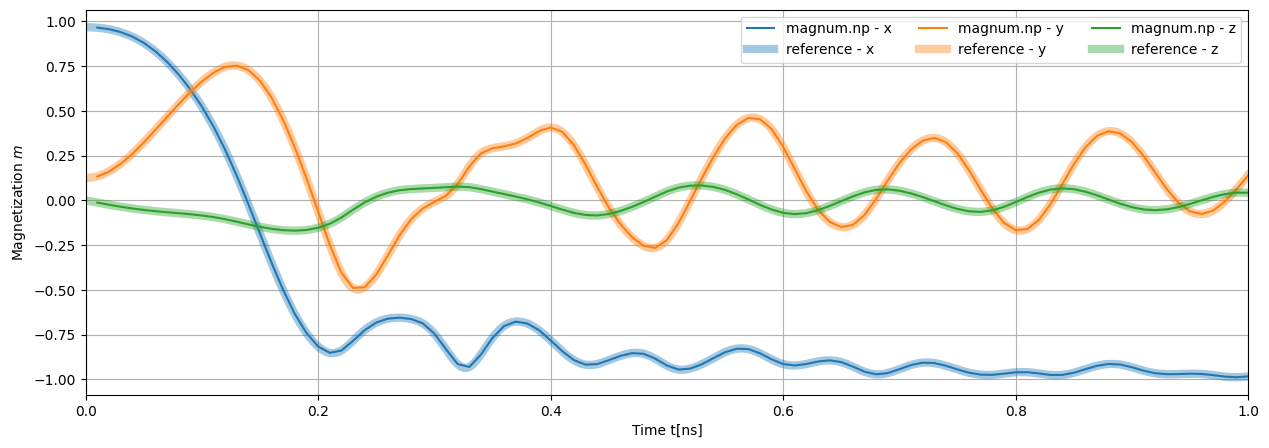

In [4]:
#TODO: read latest script content from gitlab repository, as soon as %load works with Colab

import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/log.dat")
ref = np.loadtxt("ref/m.dat")

fig, ax = plt.subplots(figsize=(15, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
ax.plot(data[:,0]*1e9, data[:,1], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[:,0]*1e9, ref[:,1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,2], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[:,0]*1e9, ref[:,2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,3], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[:,0]*1e9, ref[:,3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")

ax.set_xlim([0,1])
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data/results.png")